In [1]:
from src.knn import *
import datetime
from scipy.io import arff
import matplotlib.pyplot as plt

In [2]:
k_fold = 10
data = arff.loadarff('datasets/kc2.arff')
df = pd.DataFrame(data[0])
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'no'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'yes'
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359.0,35.0,9.0,10.0,47.0,106.0,692.0,467.0,106.0,b'yes'
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174.0,15.0,34.0,5.0,23.0,67.0,343.0,232.0,65.0,b'yes'
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142.0,7.0,19.0,4.0,18.0,58.0,310.0,190.0,51.0,b'yes'


In [3]:
data = df.values[:df.shape[0] - 2]
np.random.shuffle(data)
print(data.shape)

k_values = [1,2,3,5,7,9,11,13,15]
accs = []
weighted_accs = []

print("---------------------KNN---------------------")
accs = cross_validation(data, 10, k_values)
for i in range(len(k_values)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))

print("\n---------------------WEIGHTED KNN---------------------")
weighted_accs = cross_validation(data, 10, k_values, with_weight=True)
for i in range(len(k_values)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], weighted_accs[i]))

(520, 22)
---------------------KNN---------------------
The accuracy for k = 1 is: 76.92%
The accuracy for k = 2 is: 81.92%
The accuracy for k = 3 is: 80.58%
The accuracy for k = 5 is: 82.50%
The accuracy for k = 7 is: 82.88%
The accuracy for k = 9 is: 83.65%
The accuracy for k = 11 is: 83.27%
The accuracy for k = 13 is: 82.69%
The accuracy for k = 15 is: 81.54%

---------------------WEIGHTED KNN---------------------
The accuracy for k = 1 is: 76.92%
The accuracy for k = 2 is: 76.73%
The accuracy for k = 3 is: 78.65%
The accuracy for k = 5 is: 79.81%
The accuracy for k = 7 is: 80.77%
The accuracy for k = 9 is: 80.58%
The accuracy for k = 11 is: 80.96%
The accuracy for k = 13 is: 81.35%
The accuracy for k = 15 is: 81.54%


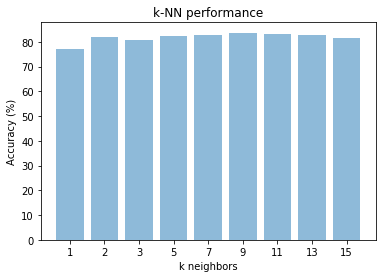

In [4]:
plt.xlabel('k neighbors')
plt.ylabel('Accuracy (%)')
plt.title('k-NN performance')
plt.bar(np.arange(len(k_values)), accs, align='center', alpha=0.5)
plt.xticks(np.arange(len(k_values)), k_values)
plt.show()